# Problem statement:
###### An education company named X Education sells online courses to industry professionals. X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [913]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_rows',1000)
pd.set_option('max_columns',500)

In [914]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# 1) Data loading and cleaning

## 1.1) Import the data 

In [915]:
leads = pd.read_csv('Leads.csv')

In [916]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2) Inspect the data 

In [917]:
leads.shape

(9240, 37)

In [918]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [919]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3) Cleaning the data 

In [920]:
leads = leads.replace('Select',np.nan)

In [921]:
# Find out the null values in the dataframe
round((leads.isnull().mean())*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

###### Drop the features have null values more than 45%

In [922]:
leads = leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [923]:
# Find out the null values in the dataframe again
round((leads.isnull().mean())*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [924]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

###### Drop the features those contain single/unique value 

In [925]:
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [926]:
# Find out the null values in the dataframe again
round((leads.isnull().mean())*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [927]:
leads['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [928]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

###### These four features ['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course'] have huge amount of null values, so we should deal with them

In [929]:
leads['Country']=leads['Country'].fillna('not provided')
leads['Specialization']=leads['Specialization'].fillna('not provided')
leads['What is your current occupation']=leads['What is your current occupation'].fillna('not provided')
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna('not provided')
leads['Tags']=leads['Tags'].fillna('not provided')
leads['City']=leads['City'].fillna('not provided')

In [930]:
# Lets take the Country feature
100*(leads['Country'].value_counts(normalize=True))

India                   70.259740
not provided            26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [931]:
def fix(x):
    category=''
    if x=='India':
        category='India'
    elif x=='not provided':
        category='not provided'
    else:
        category='out side India'
    return category

In [932]:
leads['Country']=leads['Country'].apply(fix)

In [933]:
leads['Country'].value_counts(normalize=True)*100

India             70.259740
not provided      26.634199
out side India     3.106061
Name: Country, dtype: float64

In [934]:
leads.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

###### Lets drop the rows, because they have very few null values which don't effect our analysis 

In [935]:
leads = leads[~leads['Lead Source'].isnull()]
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]
leads = leads[~leads['Last Activity'].isnull()]

In [936]:
leads.shape

(9074, 25)

In [937]:
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [938]:
print(leads['Prospect ID'].nunique())
print(leads['Lead Number'].nunique())

9074
9074


###### Lets drop the prospect ID and Lead Number feature, because they have unique number for all the rows 

In [939]:
leads = leads.drop(['Prospect ID','Lead Number'],axis=1)

In [940]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

In [941]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [942]:
leads.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [943]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [944]:
def fix_leadsource(x):
    category=''
    if x=='Google':
        category='Google'
    elif x=='Direct Traffic':
        category='Direct Traffic'
    elif x=='Olark Chat':
        category='Olark Chat'
    elif x=='Organic Search':
        category='Organic Search'
    else:
        category='Other Source'
    return category

In [945]:
leads['Lead Source'] = leads['Lead Source'].apply(fix_leadsource)

In [946]:
(round(leads['Lead Source'].value_counts(normalize=True)*100))

Google            32.0
Direct Traffic    28.0
Olark Chat        19.0
Organic Search    13.0
Other Source       8.0
Name: Lead Source, dtype: float64

In [947]:
leads['Tags'].value_counts(normalize=True)*100

not provided                                         36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [948]:
def fix_tags(x):
    category=''
    if x=='not provided':
        category='not provided'
    elif x=='Will revert after reading the email':
        category='Will revert after reading the email'
    elif x=='Ringing':
        category='Ringing'
    else:
        category='Other Tags'
    return category

In [949]:
leads['Tags'] = leads['Tags'].apply(fix_tags)

In [950]:
leads['Tags'].value_counts(normalize=True)*100

not provided                           36.665197
Other Tags                             28.036147
Will revert after reading the email    22.217324
Ringing                                13.081331
Name: Tags, dtype: float64

In [951]:
leads.nunique()

Lead Origin                                         4
Lead Source                                         5
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [952]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

In [953]:
leads.shape

(9074, 23)

In [954]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

# 2) Exploratory Data Analysis 

## 2.1) Univariate Analysis 

### Univariate analysis on categorical features 

In [955]:
cat_cols = leads.select_dtypes('object')
len(cat_cols.columns)

19

In [956]:
for i in cat_cols:
    print(leads[i].value_counts(normalize=True)*100,'\n','------------------------------')

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64 
 ------------------------------
Google            31.606789
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Other Source       8.331497
Name: Lead Source, dtype: float64 
 ------------------------------
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64 
 ------------------------------
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64 
 ------------------------------
Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.9918

In [957]:
def cat_count_plot(data,col):
    plt.figure(figsize=[15,25])
    k=1
    for i in col:
        l=((len(col)//2)+1)
        plt.subplot(l,2,k)
        sns.countplot(data[i])
        plt.title(i)
        k=k+1
    plt.tight_layout()
    plt.show()

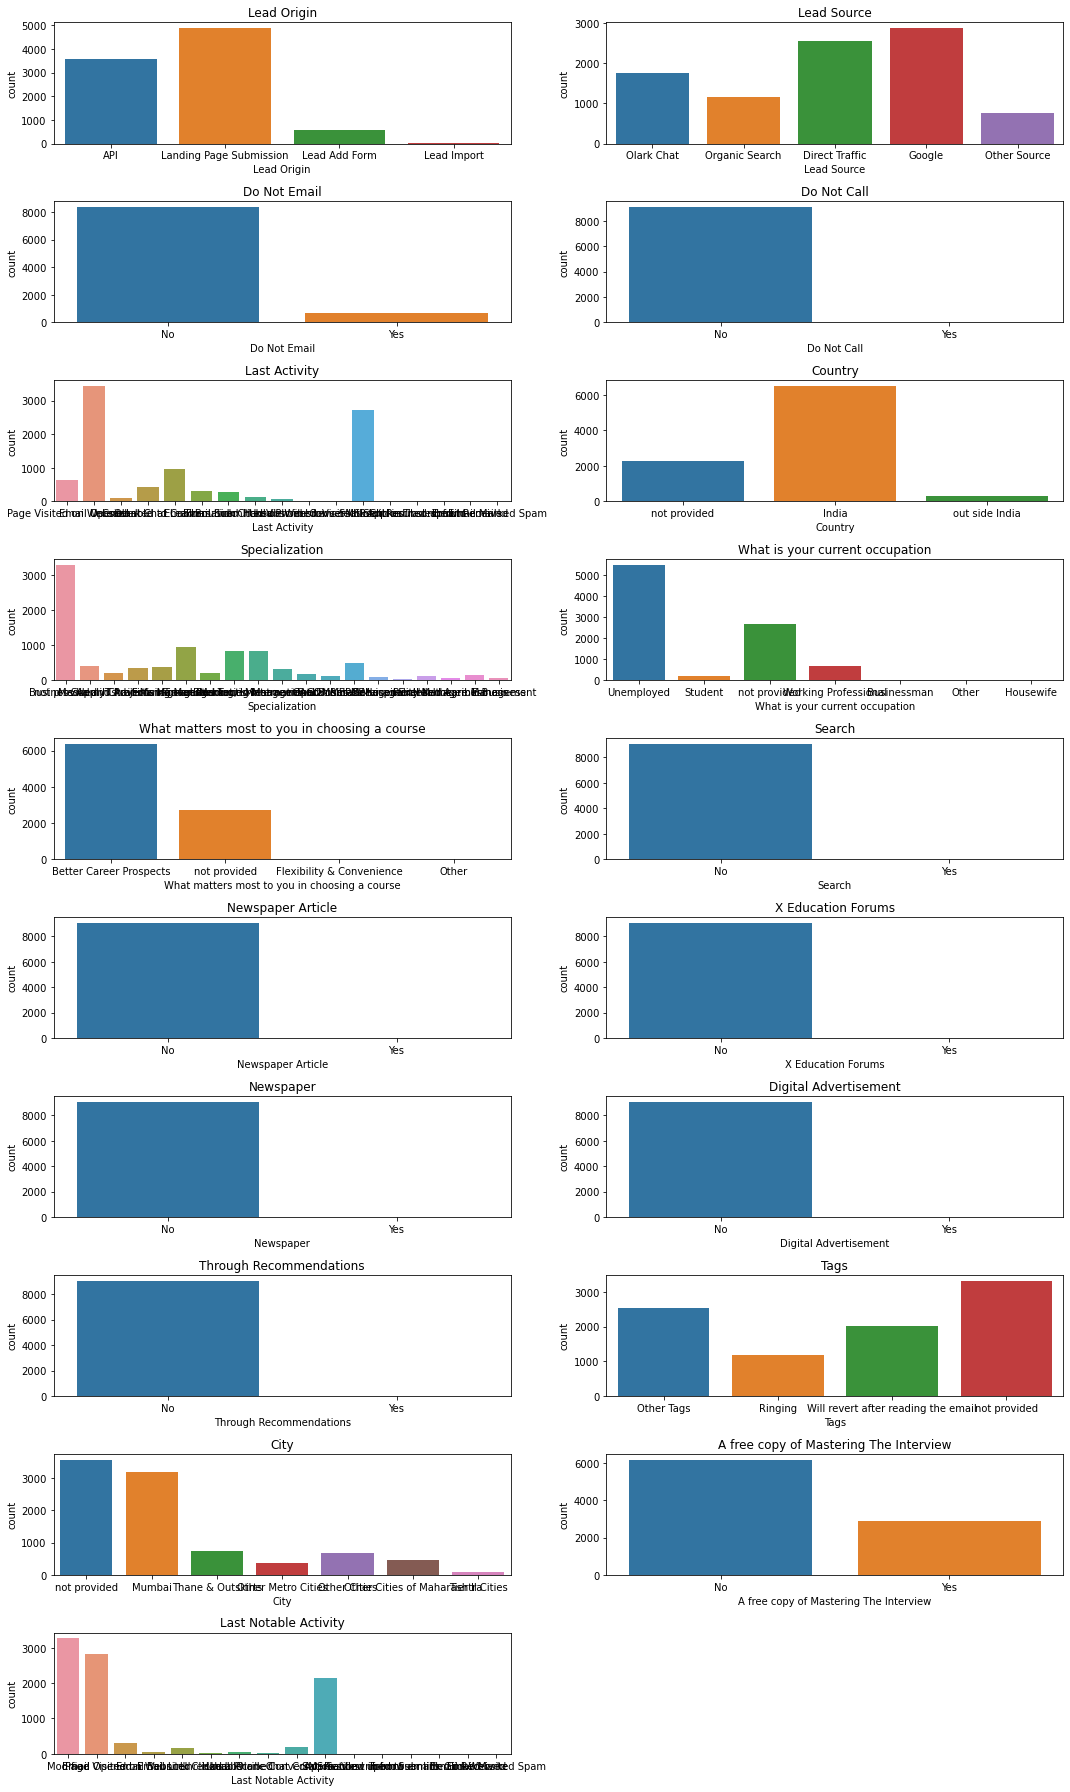

In [958]:
cat_count_plot(leads,cat_cols.columns)

###### Lets plot the graphs for these features again, because its not clearly visible in the above plots 

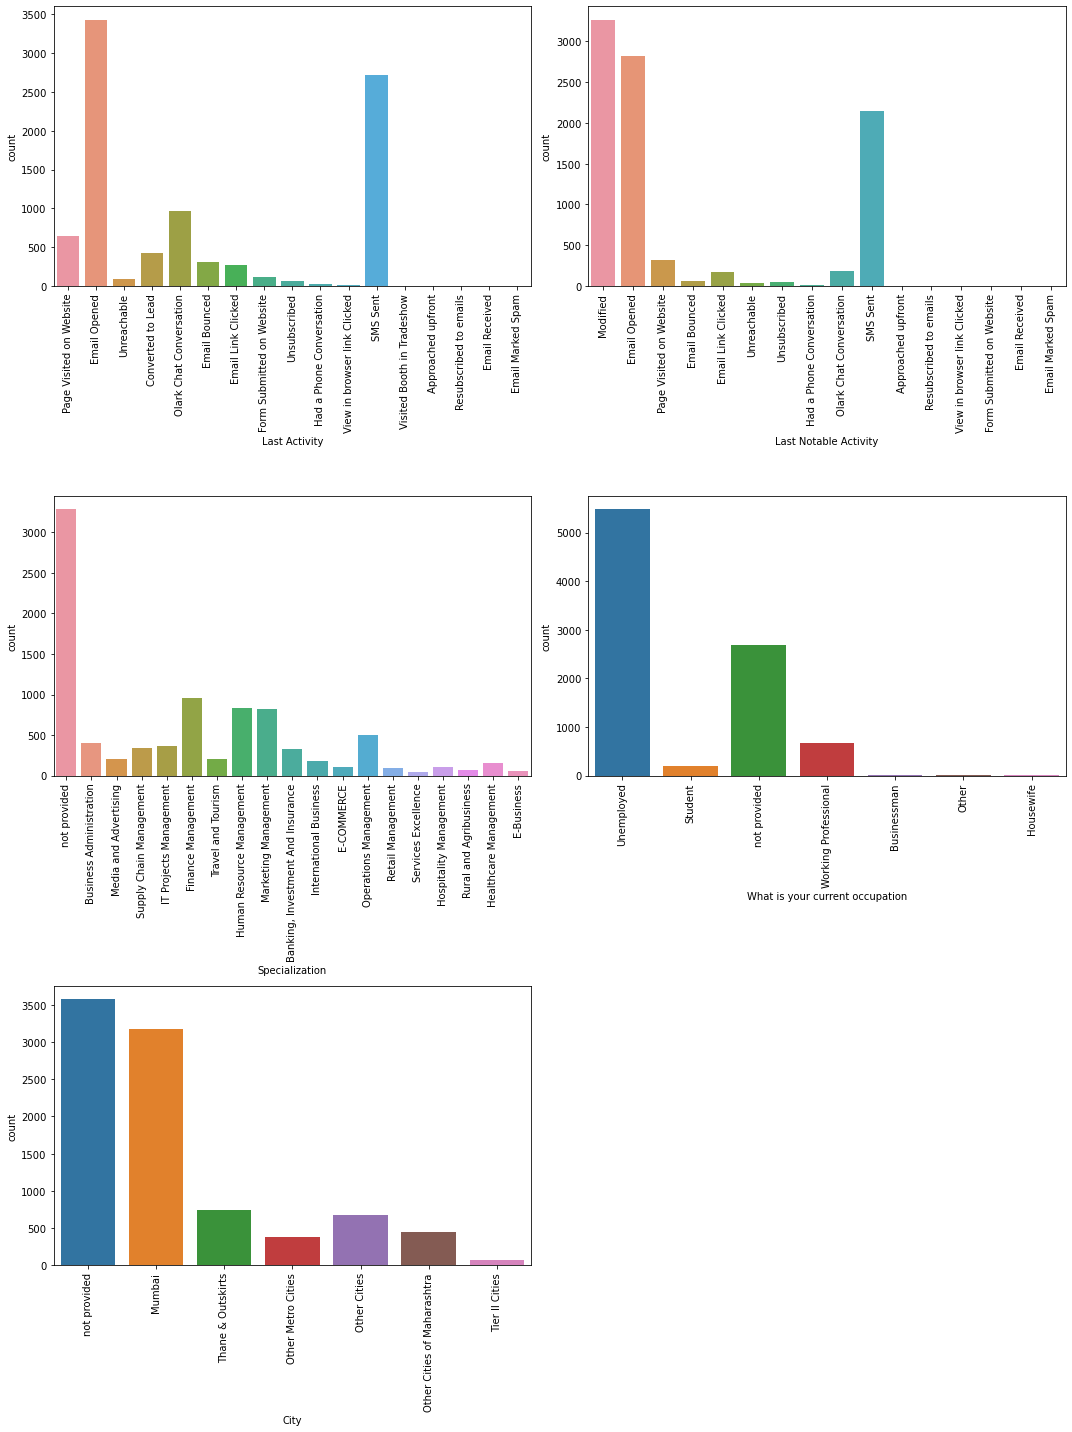

In [959]:
plt.figure(figsize=[15,20])
plt.subplot(3,2,1)
sns.countplot(leads['Last Activity'])
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.countplot(leads['Last Notable Activity'])
plt.xticks(rotation=90)
plt.subplot(3,2,3)
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.countplot(leads['City'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Univariate analysis on numerical features 

In [960]:
num_cols = leads.select_dtypes(['int','float'])
len(num_cols.columns)

4

In [961]:
def num_hist_plot(data,col):
    plt.figure(figsize=[15,10])
    k=1
    for i in col:
        l=((len(col)//2)+1)
        plt.subplot(l,2,k)
        sns.histplot(data[i],bins=50)
        plt.title(i)
        k=k+1
    plt.tight_layout()
    plt.show()

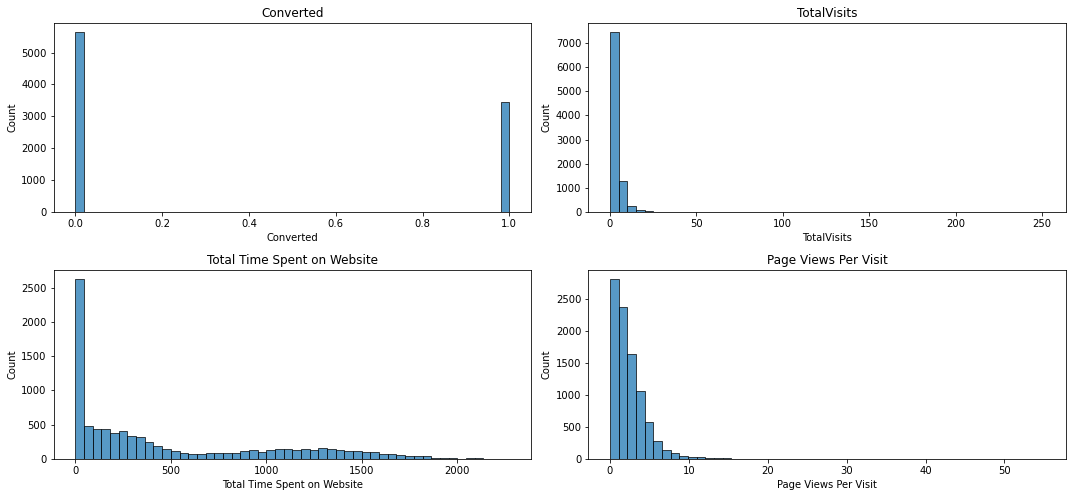

In [962]:
num_hist_plot(leads,num_cols.columns)

In [963]:
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


###### There are not any such outliers 

## 2.2) Segmented univariate analysis 

In [964]:
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [965]:
# Ananysis categorical features based on converted
def cat_count_plot1(data,col):
    plt.figure(figsize=[15,25])
    k=1
    for i in col:
        l=((len(col)//2)+1)
        plt.subplot(l,2,k)
        sns.countplot(data=data,x=i,hue='Converted')
        plt.title(i)
        k=k+1
    plt.tight_layout()
    plt.show()

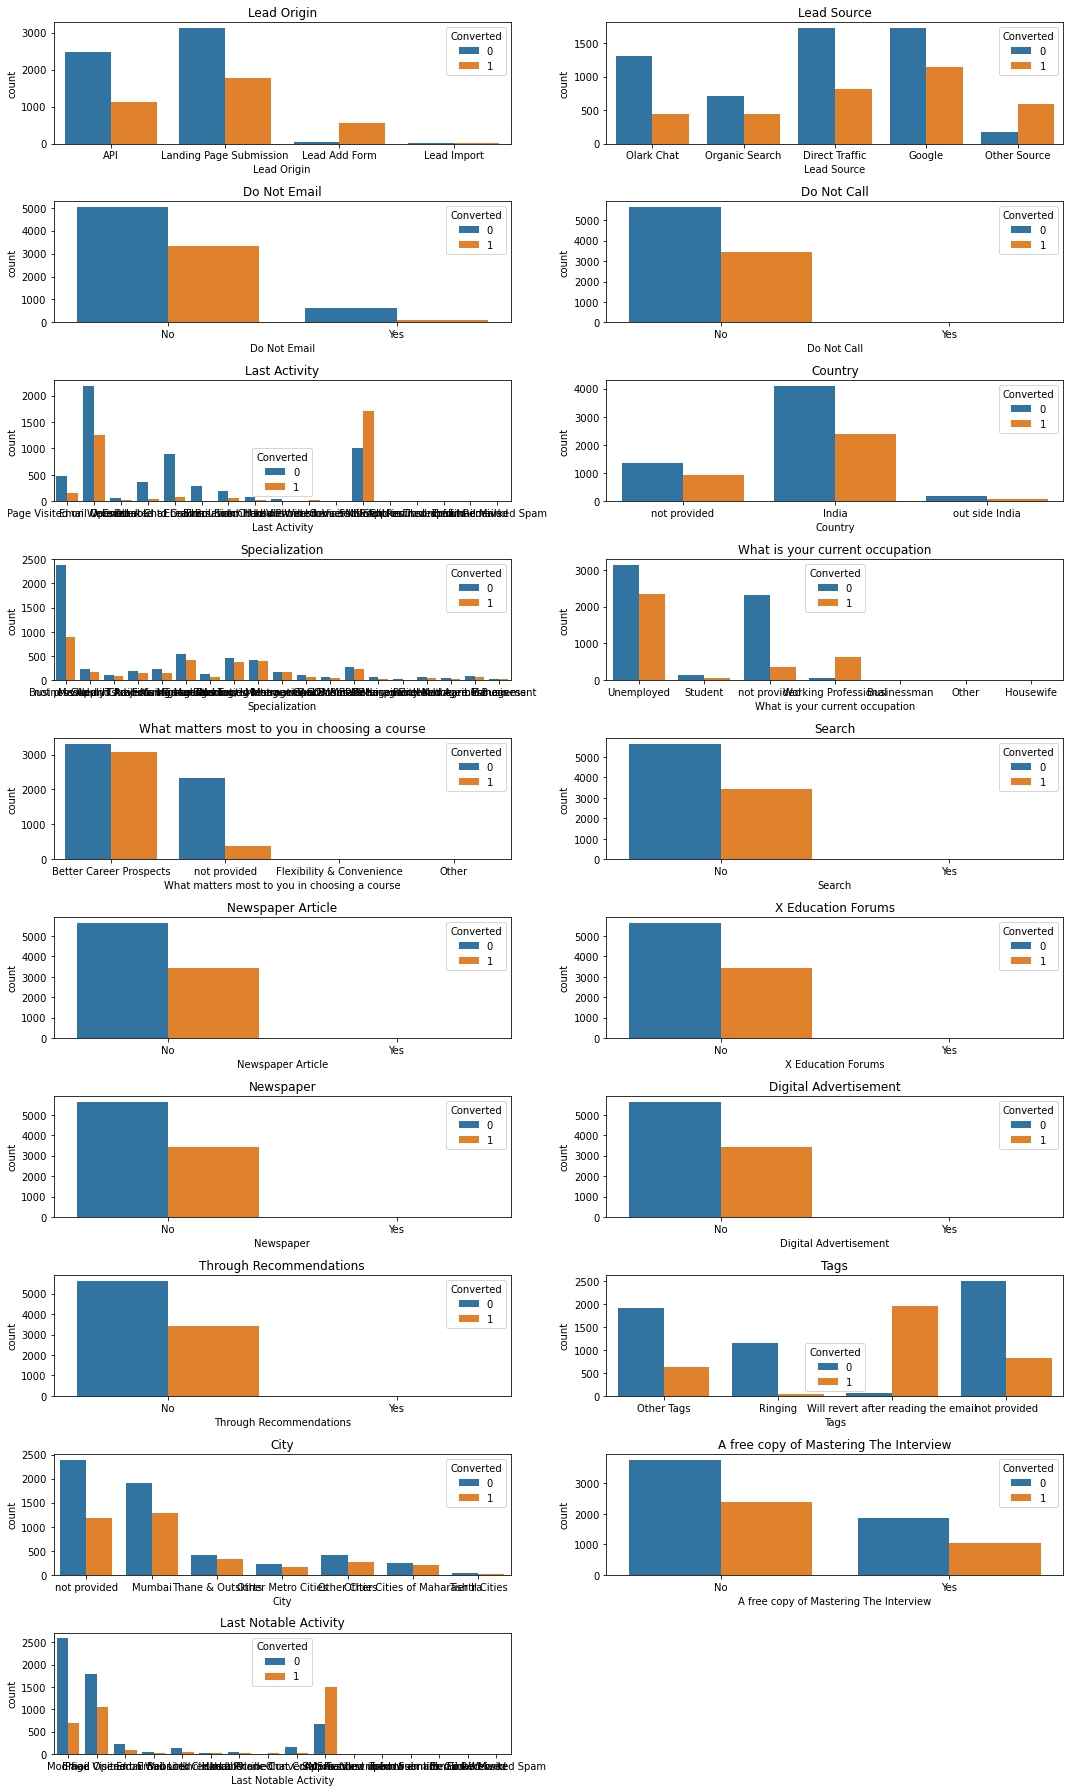

In [966]:
cat_count_plot1(leads,cat_cols.columns)

###### Lets plot the graphs for these features again, because its not clearly visible 

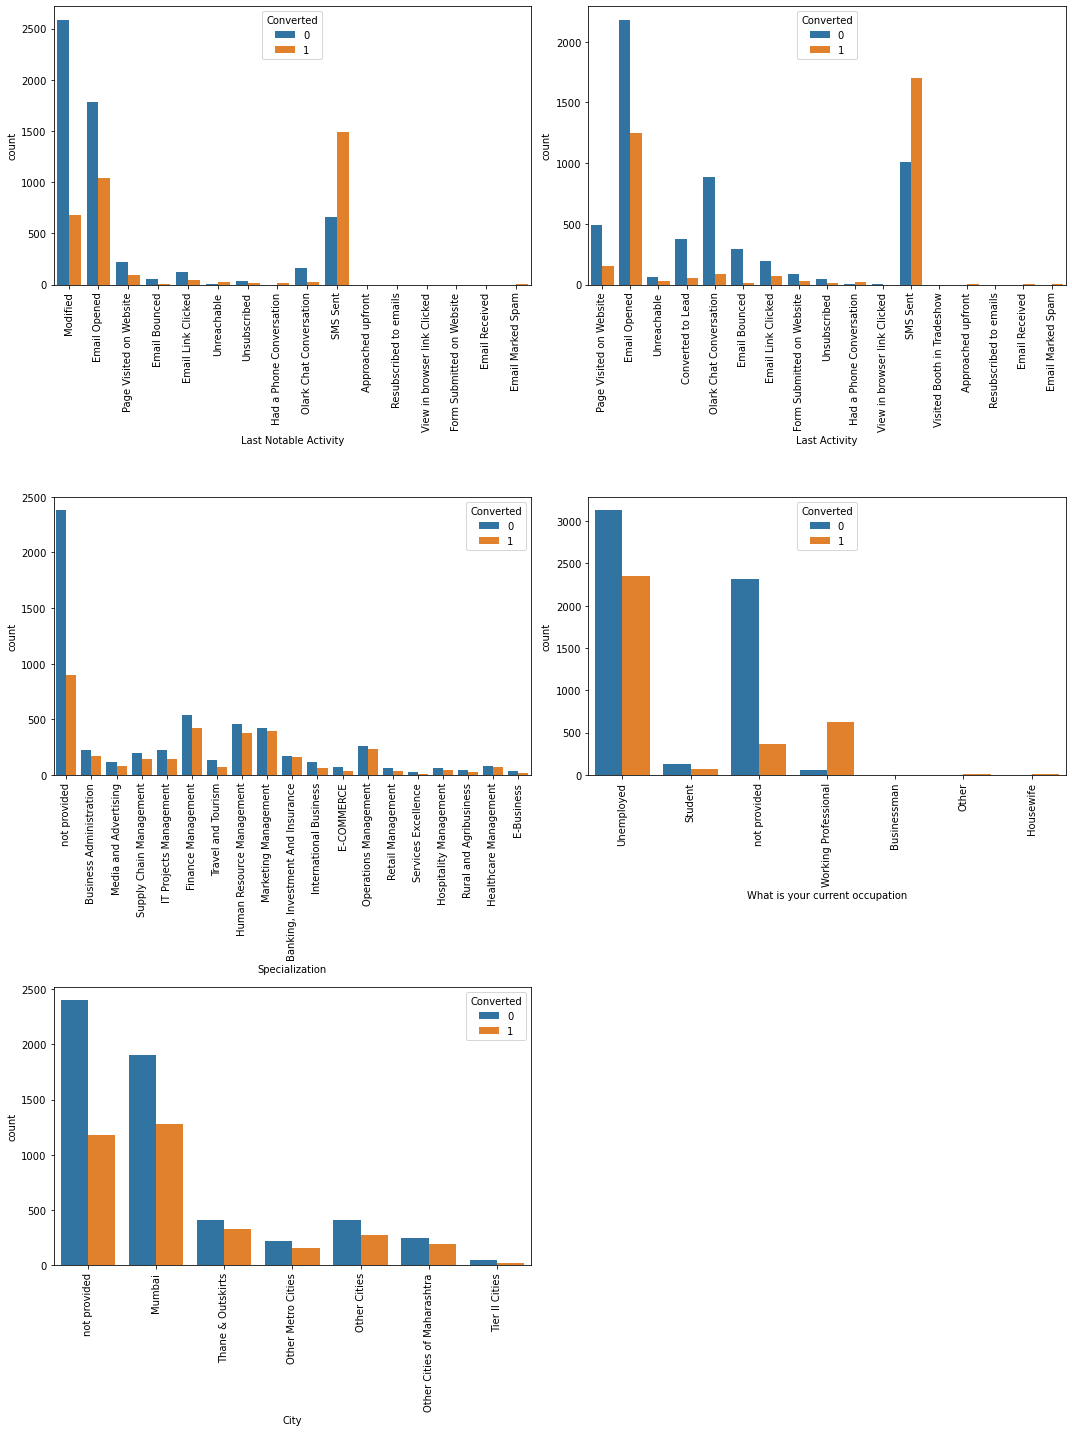

In [967]:
plt.figure(figsize=[15,20])
plt.subplot(3,2,1)
sns.countplot(data=leads,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.countplot(data=leads,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.subplot(3,2,3)
sns.countplot(data=leads,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.countplot(data=leads,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.countplot(data=leads,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Lets plot a heatmap 

<AxesSubplot:>

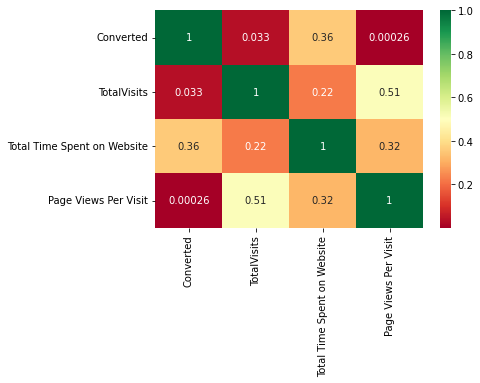

In [968]:
sns.heatmap(leads.corr(),cmap='RdYlGn',annot=True)

###### Lets drop some features, as they hava imbalance data 

In [969]:
leads = leads.drop(['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [970]:
leads.shape

(9074, 15)

###### Lets drop  'Last Notable Activity' feature, becuase it is not so relevant

In [971]:
leads = leads.drop('Last Notable Activity',axis=1)

In [972]:
leads.shape

(9074, 14)

# 3) Create dummy variables 

In [973]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Country                                        9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

In [974]:
leads.nunique()

Lead Origin                                         4
Lead Source                                         5
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Tags                                                4
City                                                7
A free copy of Mastering The Interview              2
dtype: int64

In [975]:
dummy= pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']],drop_first=True)

In [976]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_out side India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [977]:
# Concat the two dataframes
leads_final = pd.concat([leads,dummy],axis=1)

In [978]:
leads_final.shape

(9074, 75)

In [979]:
leads_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_out side India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,Other Tags,not provided,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,not provided,Unemployed,Better Career Prospects,Ringing,not provided,No,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,not provided,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [980]:
# Lets drop the irrelevant features
leads_final = leads_final.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City'],axis=1)

In [981]:
leads_final.shape

(9074, 66)

In [982]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_out side India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided
0,0,0.0,0,0.0,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,No,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,2.0,1532,2.0,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,No,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


###### Lets convert the binary variables from (Yes/No) to (1/0)

In [983]:
leads_final['A free copy of Mastering The Interview'] = leads_final['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [984]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_out side India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [985]:
leads_final.shape

(9074, 66)

# 4) Train-Test Split 

In [986]:
x = leads_final.drop('Converted',axis=1)

In [987]:
y = leads_final['Converted']

In [988]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=100)

In [989]:
x_train.shape , y_train.shape

((6351, 65), (6351,))

In [990]:
x_test.shape , y_test.shape

((2723, 65), (2723,))

# 5)  Standardization 

In [991]:
scaler = MinMaxScaler()
scale_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
x_train[scale_vars] = scaler.fit_transform(x_train[scale_vars])

In [992]:
x_train.describe()[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.013831,0.217585,0.099046
std,0.020602,0.244868,0.087462
min,0.000000,0.000000,0.000000
25%,0.003984,0.004492,0.041667
50%,0.011952,0.110961,0.083333
75%,0.019920,0.413522,0.138750
max,1.000000,1.000000,1.000000


In [993]:
x_test[scale_vars] = scaler.transform(x_test[scale_vars])

In [994]:
x_test.describe()[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2723.000000,2723.000000,2723.000000
mean,0.013625,0.215404,0.098081
std,0.016088,0.245176,0.095786
min,0.000000,0.000000,0.000000
25%,0.003984,0.005391,0.041667
50%,0.011952,0.108266,0.083333
75%,0.019920,0.416891,0.125000
max,0.294821,1.020665,2.291667


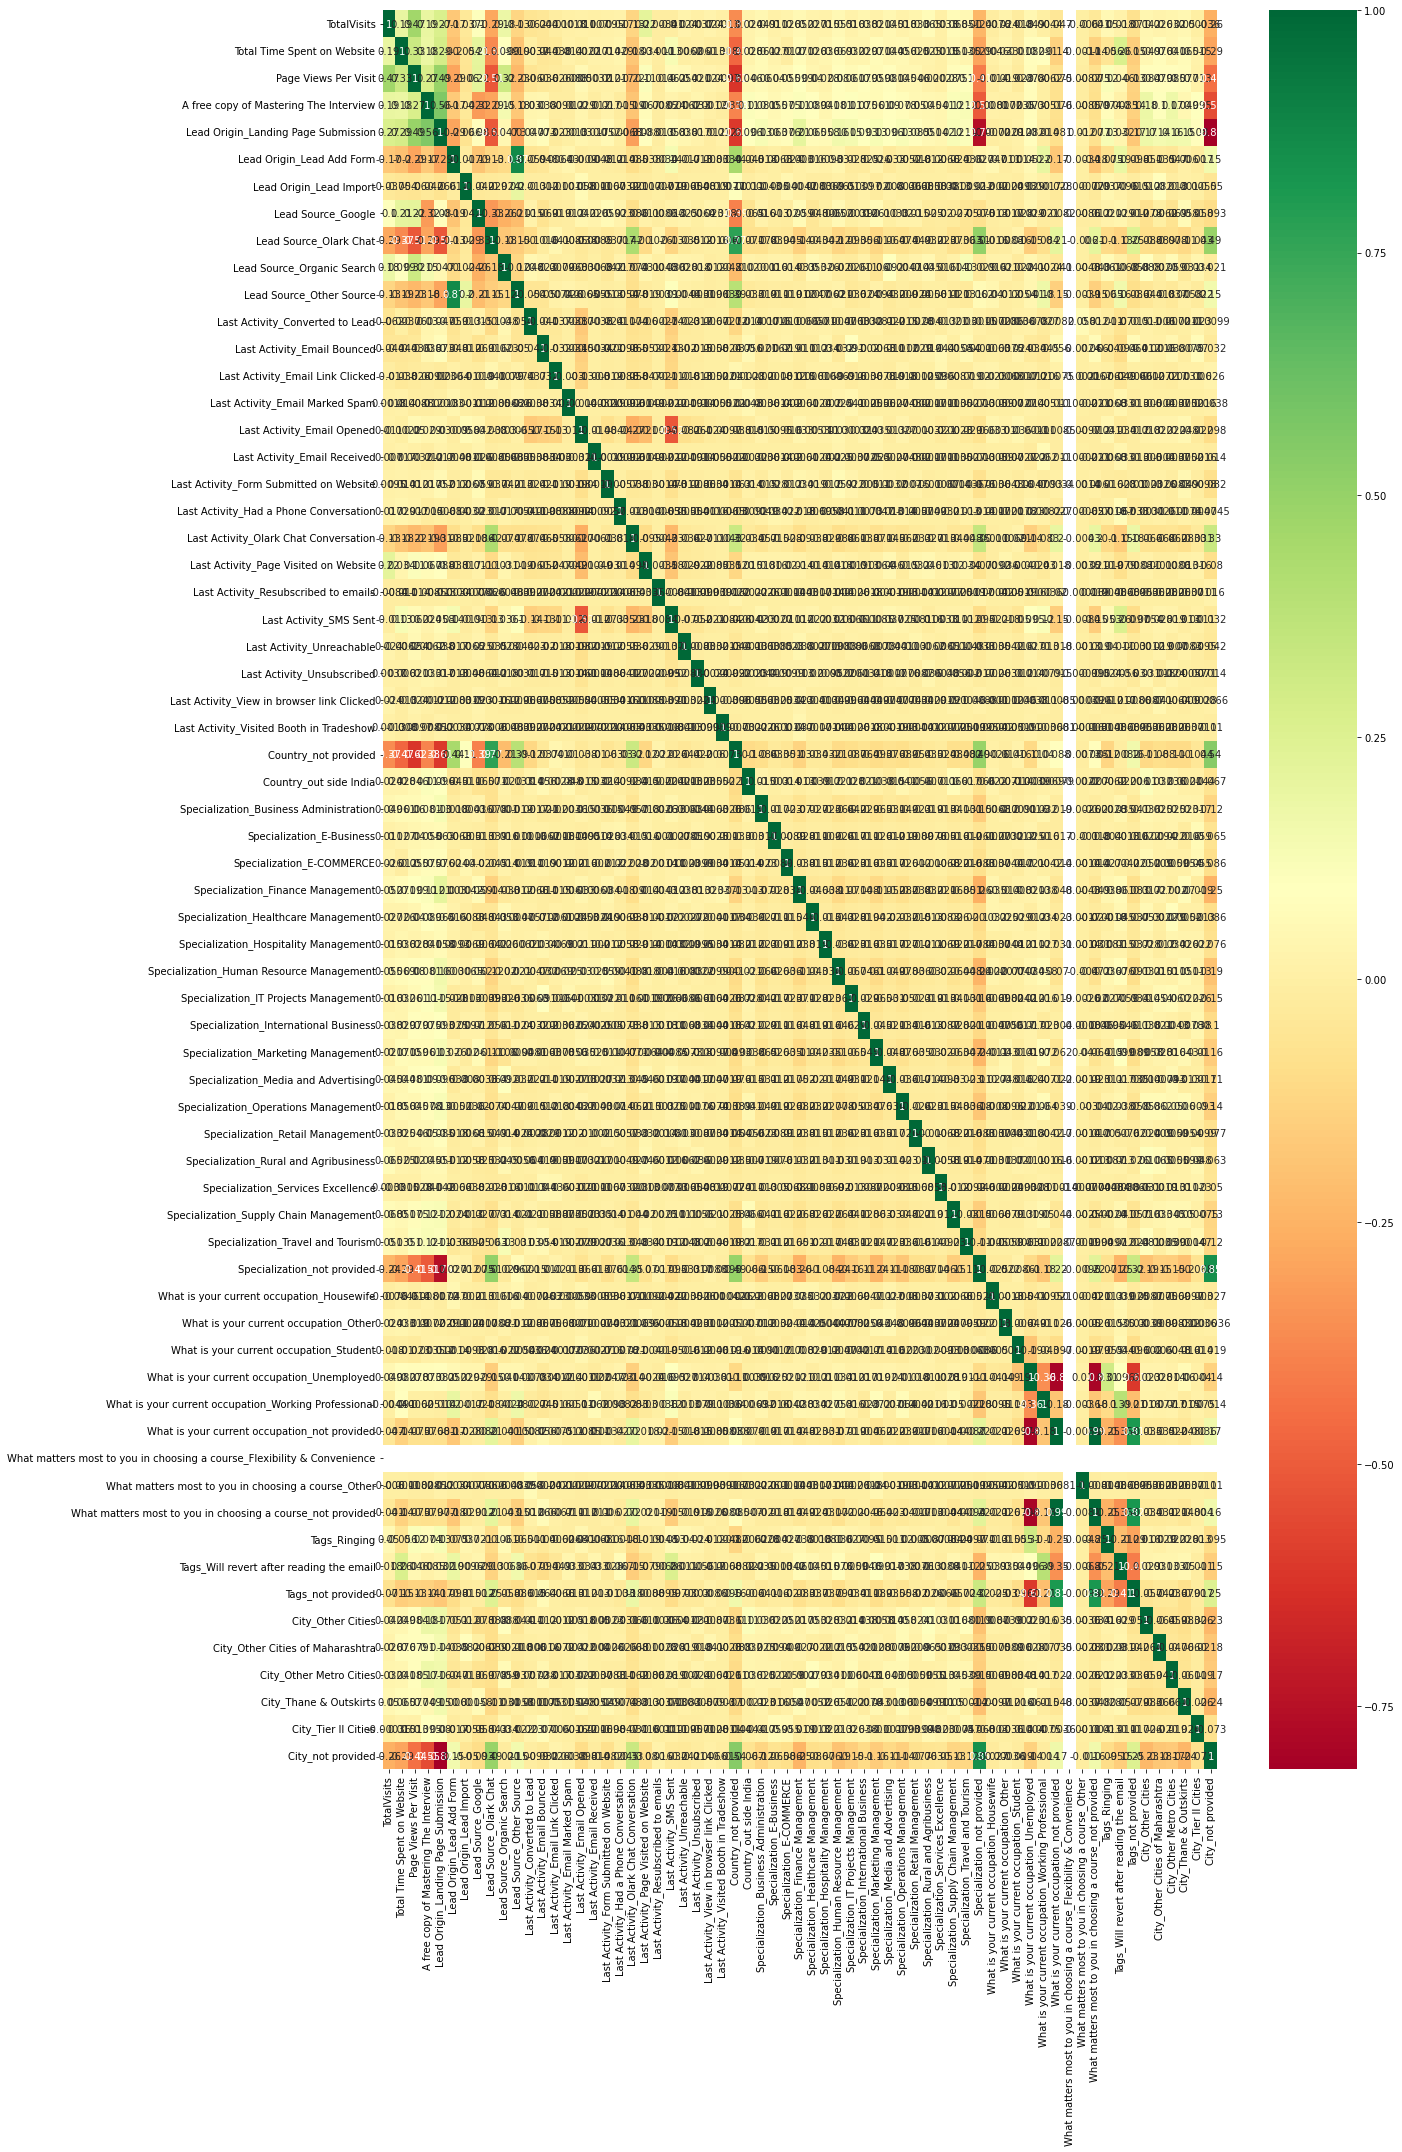

In [995]:
# lets check the correlation between the x_train variables
plt.figure(figsize=[20,30])
sns.heatmap(x_train.corr(),cmap='RdYlGn',annot=True)
plt.tight_layout()
plt.show()

# 6) Model Building 

In [996]:
# Create the Logistic Regression model
logreg = LogisticRegression()

In [997]:
# Use RFE to select relevant features
rfe = RFE(logreg,15)
rfe = rfe.fit(x_train,y_train)

In [998]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 23),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Other Source', False, 25),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Marked Spam', False, 49),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Had a Phone Conversation', False, 2),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Last Activity_Resubscribed to emails', Tr

In [999]:
rfe.support_

array([ True,  True,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [1000]:
rfe_col = x_train.columns[rfe.support_]

In [1001]:
(rfe_col)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Country_not provided',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not provided',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_not provided'],
      dtype='object')

In [1002]:
x_train = x_train[rfe_col]

In [1003]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Country_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided
3009,0.007968,0.178347,0.083333,0,0,0,0,0,0,0,0,1,0,0,1
1012,0.007968,0.085355,0.083333,0,0,1,0,0,0,0,1,1,0,0,1
9226,0.000000,0.000000,0.000000,0,0,0,0,0,1,1,0,0,1,0,0
4750,0.007968,0.619946,0.083333,0,0,0,0,0,1,0,0,1,0,0,1
7987,0.019920,0.711590,0.104167,0,0,0,0,0,1,0,0,0,0,0,0


In [1004]:
# Model-1
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.0
Date:                Tue, 18 Oct 2022   Deviance:                       3222.1
Time:                        21:53:34   Pearson chi2:                 9.66e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.7446      0.142    -19.330      0.000      -3.023      -2.466
TotalVisits                                                    9.3404      2.962      3.153      0.002       3.534      15.147
Total Time Spent on Website                                    4.6917      0.217     21.650      0.000       4.267       5.116
Page Views Per Visit                                          -2.2064      0.730     -3.023      0.003      -3.637      -0.776
Lead Origin_Lead Add Form                                      2.9482      0.266     11.085      0.000       2.427       3.469
Last Activity_Converted to Lead                               -1.5163      0.295     -5.137      0.000      -2.095      -0.938
Last Activity_Email Bounced                                   -2.1195      0.416     -5.095      0.000      -2.935      -1.304
Last Activity_Olark Chat Conversation                         -1.4442      0.194     -7.445      0.000      -1.824      -1.064
Last Activity_Resubscribed to emails                          24.3527   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                         1.3446      0.104     12.970      0.000       1.141       1.548
Country_not provided                                           1.1336      0.160      7.090      0.000       0.820       1.447
What is your current occupation_Working Professional           1.3295      0.267      4.986      0.000       0.807       1.852
What matters most to you in choosing a course_not provided    -2.1756      0.143    -15.259      0.000      -2.455      -1.896
Tags_Ringing                                                  -3.3660      0.260    -12.952      0.000      -3.875      -2.857
Tags_Will revert after reading the email                       4.4645      0.197     22.667      0.000       4.078       4.851
Tags_not provided                                              1.6474      0.141     11.701      0.000       1.371       1.923
==============================================================================================================================
"""

In [1005]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Tags_not provided,5.32
11,What matters most to you in choosing a course_...,4.46
2,Page Views Per Visit,3.08
9,Country_not provided,2.38
1,Total Time Spent on Website,2.21
13,Tags_Will revert after reading the email,2.14
0,TotalVisits,1.86
8,Last Activity_SMS Sent,1.70
3,Lead Origin_Lead Add Form,1.56
6,Last Activity_Olark Chat Conversation,1.41


In [1006]:
x_train = x_train.drop('Last Activity_Resubscribed to emails',axis=1)

In [1007]:
x_train.shape

(6351, 14)

###### Lets create the model again 

In [1008]:
# Model-2
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1614.8
Date:                Tue, 18 Oct 2022   Deviance:                       3229.7
Time:                        21:53:35   Pearson chi2:                 9.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.7381      0.142    -19.311      0.000      -3.016      -2.460
TotalVisits                                                    9.3214      2.959      3.150      0.002       3.522      15.121
Total Time Spent on Website                                    4.6877      0.217     21.650      0.000       4.263       5.112
Page Views Per Visit                                          -2.2099      0.729     -3.031      0.002      -3.639      -0.781
Lead Origin_Lead Add Form                                      2.9354      0.266     11.048      0.000       2.415       3.456
Last Activity_Converted to Lead                               -1.5183      0.295     -5.146      0.000      -2.097      -0.940
Last Activity_Email Bounced                                   -2.1201      0.416     -5.100      0.000      -2.935      -1.305
Last Activity_Olark Chat Conversation                         -1.4505      0.194     -7.488      0.000      -1.830      -1.071
Last Activity_SMS Sent                                         1.3412      0.104     12.954      0.000       1.138       1.544
Country_not provided                                           1.1454      0.160      7.176      0.000       0.833       1.458
What is your current occupation_Working Professional           1.3259      0.267      4.975      0.000       0.804       1.848
What matters most to you in choosing a course_not provided    -2.1543      0.142    -15.148      0.000      -2.433      -1.876
Tags_Ringing                                                  -3.3686      0.260    -12.965      0.000      -3.878      -2.859
Tags_Will revert after reading the email                       4.4597      0.197     22.647      0.000       4.074       4.846
Tags_not provided                                              1.6260      0.140     11.574      0.000       1.351       1.901
==============================================================================================================================
"""

###### Lets check the VIF again 

In [1009]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_not provided,5.31
10,What matters most to you in choosing a course_...,4.45
2,Page Views Per Visit,3.08
8,Country_not provided,2.37
1,Total Time Spent on Website,2.21
12,Tags_Will revert after reading the email,2.14
0,TotalVisits,1.86
7,Last Activity_SMS Sent,1.70
3,Lead Origin_Lead Add Form,1.56
6,Last Activity_Olark Chat Conversation,1.41


In [1010]:
x_train = x_train.drop('Tags_not provided',axis=1)

In [1011]:
x_train.shape

(6351, 13)

###### Lets create the model again 

In [1012]:
# Model-3
x_train_sm = sm.add_constant(x_train)
logm3 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.0
Date:                Tue, 18 Oct 2022   Deviance:                       3372.0
Time:                        21:53:35   Pearson chi2:                 9.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.4017      0.134    -17.931      0.000      -2.664      -2.139
TotalVisits                                                    9.7456      2.925      3.331      0.001       4.012      15.479
Total Time Spent on Website                                    4.7477      0.214     22.207      0.000       4.329       5.167
Page Views Per Visit                                          -2.4889      0.720     -3.459      0.001      -3.899      -1.079
Lead Origin_Lead Add Form                                      2.7512      0.256     10.729      0.000       2.249       3.254
Last Activity_Converted to Lead                               -1.6258      0.290     -5.609      0.000      -2.194      -1.058
Last Activity_Email Bounced                                   -2.0324      0.407     -4.990      0.000      -2.831      -1.234
Last Activity_Olark Chat Conversation                         -1.4668      0.189     -7.744      0.000      -1.838      -1.096
Last Activity_SMS Sent                                         1.4657      0.100     14.631      0.000       1.269       1.662
Country_not provided                                           1.4225      0.155      9.202      0.000       1.119       1.725
What is your current occupation_Working Professional           1.0917      0.264      4.139      0.000       0.575       1.609
What matters most to you in choosing a course_not provided    -1.0198      0.099    -10.253      0.000      -1.215      -0.825
Tags_Ringing                                                  -3.8359      0.258    -14.862      0.000      -4.342      -3.330
Tags_Will revert after reading the email                       4.1159      0.195     21.130      0.000       3.734       4.498
==============================================================================================================================
"""

###### Lets check the VIF again 

In [1013]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.04
8,Country_not provided,2.20
1,Total Time Spent on Website,2.16
12,Tags_Will revert after reading the email,1.99
0,TotalVisits,1.86
10,What matters most to you in choosing a course_...,1.67
7,Last Activity_SMS Sent,1.65
3,Lead Origin_Lead Add Form,1.56
6,Last Activity_Olark Chat Conversation,1.41
9,What is your current occupation_Working Profes...,1.30


###### All the VIF values are good and all the p-values are below 0.05, So we get our final model 

# 7) Model Evaluation 

In [1014]:
# make the predicion
y_train_pred = logm3.predict(x_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06271083, 0.01651777, 0.03391659, 0.70220634, 0.91508236,
       0.99465665, 0.02640261, 0.86483976, 0.99634709, 0.15332949])

In [1015]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.062711
1,0,0.016518
2,0,0.033917
3,1,0.702206
4,1,0.915082


In [1016]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.062711,0
1,0,0.016518,0
2,0,0.033917,0
3,1,0.702206,1
4,1,0.915082,1


In [1017]:
# lets create the confusion_matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

In [1018]:
confusion

array([[3686,  219],
       [ 467, 1979]], dtype=int64)

In [1019]:
# Lets calculate the accuracy
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

0.8919855140922689

In [1020]:
# Lets calcualte the Sensitivity and Specificity
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))

In [1021]:
print('Sensitivity=',sensitivity)
print('Specificity=',specificity)

Sensitivity= 0.8090760425183974
Specificity= 0.9439180537772087


# 8) Plot the ROC curve 

In [1022]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1023]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted, drop_intermediate = False )

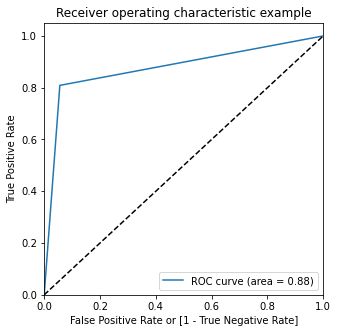

In [1024]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

## Find the optimal cutoff point 

In [1025]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x>i else 0)

In [1026]:
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062711,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016518,0,1,0,0,0,0,0,0,0,0,0
2,0,0.033917,0,1,0,0,0,0,0,0,0,0,0
3,1,0.702206,1,1,1,1,1,1,1,1,1,0,0
4,1,0.915082,1,1,1,1,1,1,1,1,1,1,1


In [1027]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.758778  0.971382  0.625608
0.2   0.2  0.855928  0.936631  0.805378
0.3   0.3  0.874980  0.881439  0.870935
0.4   0.4  0.888836  0.838512  0.920359
0.5   0.5  0.891986  0.809076  0.943918
0.6   0.6  0.885372  0.771055  0.956978
0.7   0.7  0.875138  0.719133  0.972855
0.8   0.8  0.866163  0.684383  0.980026
0.9   0.9  0.837821  0.596484  0.988988


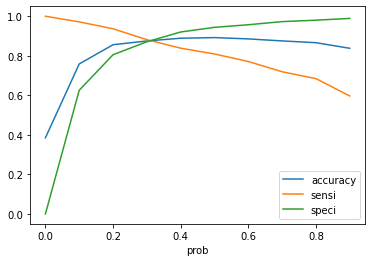

In [1028]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

######  From the above plot its clear that we take 0.3 for our cutoff point

In [1029]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.062711,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016518,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.033917,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.702206,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.915082,1,1,1,1,1,1,1,1,1,1,1,1


In [1030]:
# Let's check the accuracy.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.874980318060148

In [1031]:
# Lets create the confusion matrix again
confusion_2 = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_predicted'])
confusion_2

array([[3401,  504],
       [ 290, 2156]], dtype=int64)

In [1032]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]

In [1033]:
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))

In [1034]:
print('Sensitivity=',sensitivity)
print('Specificity=',specificity)

Sensitivity= 0.8814390842191333
Specificity= 0.8709346991037132


# 9) Calculate precision and recall 

In [1035]:
# Look the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

In [1036]:
confusion

array([[3686,  219],
       [ 467, 1979]], dtype=int64)

In [1037]:
# precision = TP/(TP+FP)
print(f'precision={precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)}')
# recall = TP/(TP/FN)
print(f'recall={recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)}')

precision=0.9003639672429481
recall=0.8090760425183974


## Precision and recall trade-off  

In [1038]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'],y_train_pred_final['Converted_prob'])

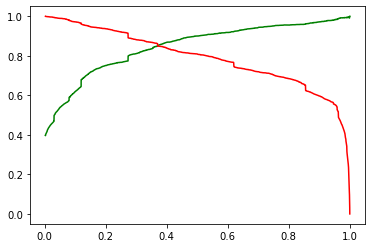

In [1039]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 10) Make prediction on the test data set 

In [1040]:
x_test = x_test[x_train.columns]

In [1041]:
x_test.shape

(2723, 13)

In [1042]:
y_test.shape

(2723,)

In [1043]:
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email
3271,0.015936,0.070530,0.166667,0,0,0,0,0,0,0,1,0,0
1490,0.019920,0.679695,0.208333,0,0,0,0,0,0,1,0,0,1
7936,0.007968,0.033243,0.083333,0,0,0,0,0,0,0,1,0,0
4216,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0
3830,0.031873,0.073675,0.333333,0,0,0,0,0,0,0,1,0,0


In [1044]:
x_test_sm = sm.add_constant(x_test)

In [1045]:
x_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Tags_Ringing,Tags_Will revert after reading the email
3271,1.0,0.015936,0.070530,0.166667,0,0,0,0,0,0,0,1,0,0
1490,1.0,0.019920,0.679695,0.208333,0,0,0,0,0,0,1,0,0,1
7936,1.0,0.007968,0.033243,0.083333,0,0,0,0,0,0,0,1,0,0
4216,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0
3830,1.0,0.031873,0.073675,0.333333,0,0,0,0,0,0,0,1,0,0


In [1046]:
y_test_pred = logm3.predict(x_test_sm)

In [1047]:
y_test_pred[:10]

3271    0.034023
1490    0.996693
7936    0.032504
4216    0.854711
3830    0.026840
1800    0.947342
6507    0.009091
4821    0.254108
4223    0.999360
4714    0.369758
dtype: float64

In [1048]:
y_test_pred_final = pd.DataFrame({'Converted':y_test,'Converted_prob':y_test_pred})
y_test_pred_final.reset_index(drop=True,inplace=True)
y_test_pred_final.head()

,Converted,Converted_prob
0,0,0.034023
1,1,0.996693
2,0,0.032504
3,1,0.854711
4,0,0.026840


###### According to the Precision-Recall tradeoff graph we get 0.35 is optimal cut-off point

In [1049]:
y_test_pred_final['Predicted']=y_test_pred_final['Converted_prob'].apply(lambda x: 1 if x > 0.35 else 0)

In [1050]:
y_test_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.034023,0
1,1,0.996693,1
2,0,0.032504,0
3,1,0.854711,1
4,0,0.026840,0


In [1051]:
# Create the confusion matrix for test data set
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])

In [1052]:
confusion_test

array([[1542,  192],
       [ 153,  836]], dtype=int64)

In [1053]:
metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])

0.8733015056922512

In [1054]:
# Lets calcualte the Sensitivity and Specificity
TP = confusion_test[1,1]
TN = confusion_test[0,0]
FP = confusion_test[0,1]
FN = confusion_test[1,0]
sensitivity = (TP/(TP+FN))
specificity = (TN/(TN+FP))

In [1055]:
print('Sensitivity=',sensitivity)
print('Specificity=',specificity)

Sensitivity= 0.8452982810920121
Specificity= 0.889273356401384


In [1056]:
# precision = TP/(TP+FP)
print(f'precision={(precision_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100)}')
# recall = TP/(TP/FN)
print(f'recall={(recall_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100)}')

precision=81.32295719844358
recall=84.5298281092012


# Conclusion 

###### It was found that the variables that mattered the most in the potential buyers are,
###### 1) Total time spent on website
###### 2) Total number of visits
###### 3) Last activity was SMS sent and Olark chat conversation
###### 4) Lead source was Google,  Direct traffic, Organic search
###### 5) Lead origin is lead add form
###### 6) Current occupation is working professional